In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(serum)

In [3]:
str(serum)

'data.frame':	5 obs. of  3 variables:
 $ Dose     : num  0.000625 0.00125 0.0025 0.005 0.01
 $ Survivors: int  7 18 32 35 38
 $ Number   : int  40 40 40 40 40


In [4]:
serum

Dose,Survivors,Number
0.000625,7,40
0.001250,18,40
0.002500,32,40
0.005000,35,40
0.010000,38,40


In [35]:
glm.1 <- glm(Survivors/Number ~ log(Dose), data=serum, weights=Number, family = binomial(link="logit"))

In [36]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),11.237452,1.5659002,7.176353,7.159576e-13
log(Dose),1.709418,0.2435208,7.019598,2.225068e-12


In [37]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,4,80.77441,NA
log(Dose),1,79.00875,3,1.76566,6.183547e-19


In [38]:
deviance(glm.1)/df.residual(glm.1)
sum(glm.1$weights*glm.1$residuals^2)/df.residual(glm.1)

[1] 0.5885532

[1] 0.5847769


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.86616, p-value = 0.2512


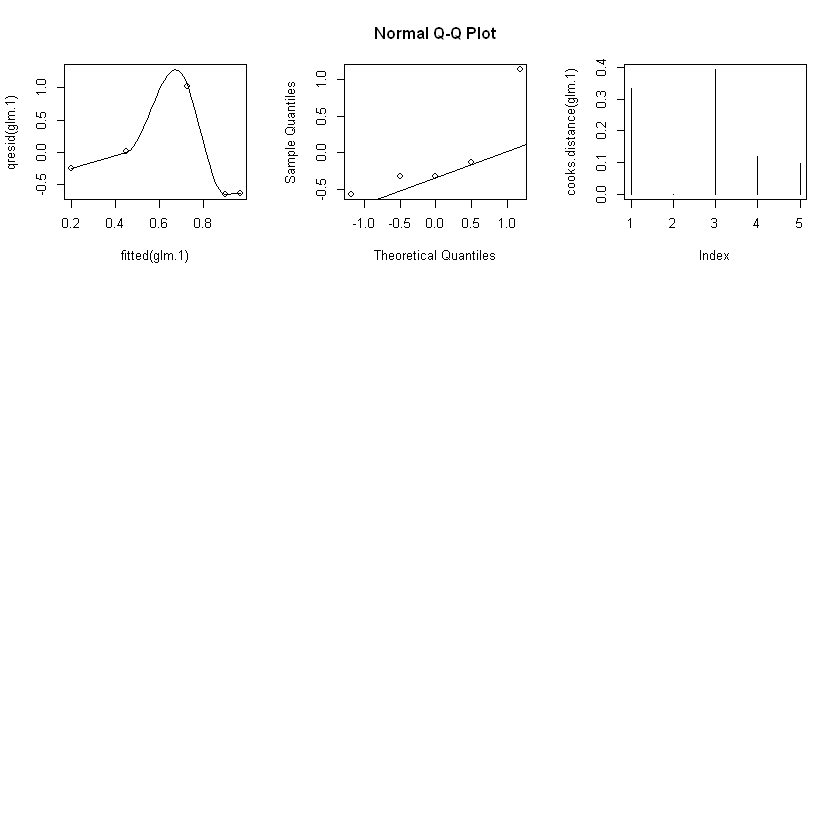

In [40]:
par(mfrow=c(3, 3))

scatter.smooth(qresid(glm.1) ~ fitted(glm.1))
#termplot(glm.1, partial.resid = TRUE, las=1)
#scatter.smooth(glm.1$linear.predictor + resid(glm.1, type="working") ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
plot(cooks.distance(glm.1), type="h")
shapiro.test(qresid(glm.1))

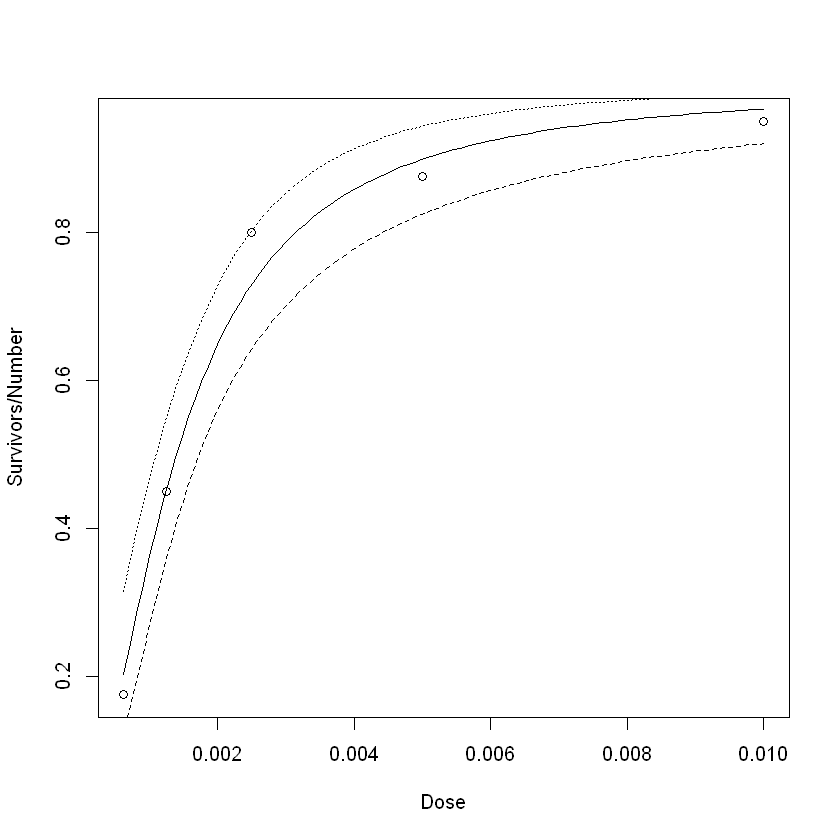

In [41]:
newDose = seq(min(serum$Dose), max(serum$Dose), length=100)
fit <- predict(glm.1, newdata=data.frame(Dose=newDose), se.fit=TRUE)
z.star <- qnorm(0.975)
ci.lo <- exp(fit$fit-z.star*fit$se.fit)/(1+exp(fit$fit-z.star*fit$se.fit))
ci.hi <- exp(fit$fit+z.star*fit$se.fit)/(1+exp(fit$fit+z.star*fit$se.fit))
plot(Survivors/Number~Dose, data=serum)
lines(exp(fit$fit)/(1+exp(fit$fit)) ~ newDose, lty=1)
lines(ci.lo ~ newDose, lty=2)
lines(ci.hi ~ newDose, lty=3)

In [42]:
dose.p(glm.1)

              Dose        SE
p = 0.5: -6.573845 0.1115851